# PART A : DATA CLEANING 

## 0. Loading the data

In [58]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import load_csv_data

# Adjust the path to where your data is stored
data_path = 'data/dataset_to_release/'

# Load the data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path)

In [101]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (328135, 321)
y_train shape: (328135,)
x_test shape: (109379, 321)


## 1. Getting rid of non-necessary features (manual way)

### Reducing the features by manually removing unnecessary features

In [102]:
# Define the columns to remove based on zero-based indexing
columns_to_remove = np.concatenate((
    np.arange(0, 27),    # 1st to 27th
    np.arange(30, 34),   # 31st to 34th
    [36, 37],            # 37th and 38th
    [51],                # 52nd
    np.arange(53, 64),   # 54th to 64th
    np.arange(66, 69)    # 67th to 69th
))

# Ensure that the columns_to_remove are unique and sorted
columns_to_remove = np.unique(columns_to_remove)
columns_to_remove.sort()

print(f"Total columns to remove: {len(columns_to_remove)}")
print(f"Columns indices to remove: {columns_to_remove}")

# Remove the specified columns from x_train and x_test
x_train_reduced = np.delete(x_train, columns_to_remove, axis=1)
x_test_reduced = np.delete(x_test, columns_to_remove, axis=1)

print(f'x_train_reduced shape: {x_train_reduced.shape}')
print(f'x_test_reduced shape: {x_test_reduced.shape}')

Total columns to remove: 48
Columns indices to remove: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 30 31 32 33 36 37 51 53 54 55 56 57 58 59 60 61 62 63 66 67 68]
x_train_reduced shape: (328135, 273)
x_test_reduced shape: (109379, 273)


### Calculating the new actual proportion of Nan values in the training data

In [103]:
# 1. Count the total number of NaN values in the training data
total_nans = np.sum(np.isnan(x_train_reduced))

# 2. Calculate the total number of elements in the training data
total_elements = x_train_reduced.size

# 3. Compute the proportion of NaN values
nan_proportion = total_nans / total_elements

# Print the results
print(f'Proportion of NaN values: {nan_proportion:.4f}')  #

Proportion of NaN values: 0.4824


## 2. Simplifying the dataset

### Replace all values representing answers of the type "don't know" or "refused to answer" by a Nan value
### (As these answers do not represent any valuable answer)
### NB : Particularly important for two-valued categorical variables 

In [104]:
def replace_placeholders_with_nan(x_train, x_test):
    """
    Replace specific placeholder values with NaN based on the following rules:
    
    For each column:
        - If the column contains 777777 or 999999, replace all 777777 and 999999 with NaN.
        - Else if the column contains 99900 or 99000, replace all 99900 and 99000 with NaN.
        - Else if the column contains 7777 or 9999, replace all 7777 and 9999 with NaN.
        - Else if the column contains 777 or 999, replace all 777 and 999 with NaN.
        - Else if the column contains 77 or 99, replace all 77 and 99 with NaN.
        - Else, replace all 7 and 9 with NaN.
    
    Args:
        x_train (np.array): Training data array.
        x_test (np.array): Test data array.
        
    Returns:
        x_train_clean (np.array): Cleaned training data.
        x_test_clean (np.array): Cleaned test data.
    """
    # Make copies to avoid modifying original data
    x_train_clean = x_train.copy()
    x_test_clean = x_test.copy()
    
    num_features = x_train_clean.shape[1]
    
    for col in range(num_features):
        # Extract the column data
        train_col = x_train_clean[:, col]
        
        # Check for the presence of 777777 or 999999
        has_777777 = np.isin([777777, 999999], train_col).any()
        if has_777777:
            # Replace 777777 and 9999 with NaN in both train and test
            x_train_clean[:, col] = np.where(np.isin(train_col, [777777, 999999]), np.nan, train_col)
            x_test_clean[:, col] = np.where(np.isin(x_test_clean[:, col], [777777, 999999]), np.nan, x_test_clean[:, col])
            continue  # Move to the next column
        
        # Check for the presence of 99900 or 99000
        has_99900 = np.isin([99900, 99000], train_col).any()
        if has_99900:
            # Replace 99900 and 99000 with NaN in both train and test
            x_train_clean[:, col] = np.where(np.isin(train_col, [99900, 99000]), np.nan, train_col)
            x_test_clean[:, col] = np.where(np.isin(x_test_clean[:, col], [99900, 99000]), np.nan, x_test_clean[:, col])
            continue  # Move to the next column
        
        # Check for the presence of 7777 or 9799
        has_7777 = np.isin([7777, 9999], train_col).any()
        if has_7777:
            # Replace 7777 and 9999 with NaN in both train and test
            x_train_clean[:, col] = np.where(np.isin(train_col, [7777, 9999]), np.nan, train_col)
            x_test_clean[:, col] = np.where(np.isin(x_test_clean[:, col], [7777, 9999]), np.nan, x_test_clean[:, col])
            continue  # Move to the next column
        
        # Check for the presence of 777 or 999
        has_777 = np.isin([777, 999], train_col).any()
        if has_777:
            # Replace 777 and 999 with NaN in both train and test
            x_train_clean[:, col] = np.where(np.isin(train_col, [777, 999]), np.nan, train_col)
            x_test_clean[:, col] = np.where(np.isin(x_test_clean[:, col], [777, 999]), np.nan, x_test_clean[:, col])
            continue  # Move to the next column
        
        # Else, check for the presence of 77 or 99
        has_77 = np.isin([77, 99], train_col).any()
        if has_77:
            # Replace 77 and 99 with NaN in both train and test
            x_train_clean[:, col] = np.where(np.isin(train_col, [77, 99]), np.nan, train_col)
            x_test_clean[:, col] = np.where(np.isin(x_test_clean[:, col], [77, 99]), np.nan, x_test_clean[:, col])
            continue  # Move to the next column
        
        # Else, replace 7 and 9 with NaN
        x_train_clean[:, col] = np.where(train_col == 7, np.nan, train_col)
        x_train_clean[:, col] = np.where(x_train_clean[:, col] == 9, np.nan, x_train_clean[:, col])
        
        x_test_clean[:, col] = np.where(x_test_clean[:, col] == 7, np.nan, x_test_clean[:, col])
        x_test_clean[:, col] = np.where(x_test_clean[:, col] == 9, np.nan, x_test_clean[:, col])
    
    return x_train_clean, x_test_clean

# APPLY TO THE DATASET

x_train_replace, x_test_replace = replace_placeholders_with_nan(x_train_reduced, x_test_reduced)

### Calculating the new proportion of Nan values in the training data

In [105]:
# 1. Count the total number of NaN values in the training data
total_nans = np.sum(np.isnan(x_train_replace))

# 2. Calculate the total number of elements in the training data
total_elements = x_train_replace.size  # or use: total_elements = x_train_reduced.shape[0] * x_train_reduced.shape[1]

# 3. Compute the proportion of NaN values
nan_proportion = total_nans / total_elements

# Print the result
print(f'Proportion of NaN values: {nan_proportion:.4f}')  #

Proportion of NaN values: 0.5002


## 3. Removing features with too many missing data

### Plotting the histogram representing Missing Data Proportions

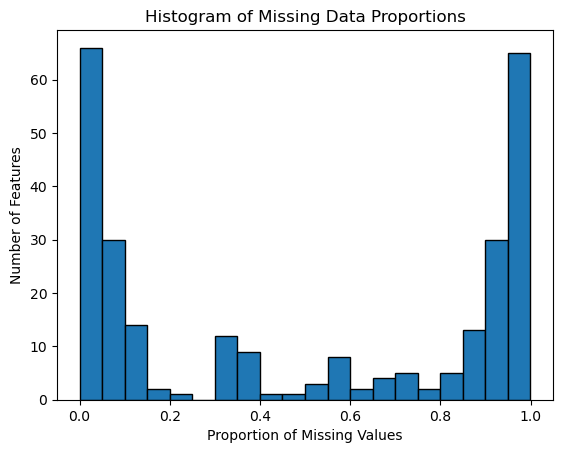

In [106]:
# we first calculate the proportion of nanValues for each feature
nan_counts = np.isnan(x_train_replace).sum(axis=0)
propMissVals = nan_counts/x_train_replace.shape[0]

plt.hist(propMissVals, bins=20, edgecolor='k')
plt.title('Histogram of Missing Data Proportions')
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Number of Features')
plt.show()

### Printing & plotting the Number of features retained as a function of the chosen Threshold

In [107]:
thresholds = np.arange(0, 1.05, 0.05)
for t in thresholds:
    num_features = np.sum(propMissVals <= t)
    print(f'Threshold: {t*100:.1f}%, Number of features retained: {num_features}')

Threshold: 0.0%, Number of features retained: 16
Threshold: 5.0%, Number of features retained: 66
Threshold: 10.0%, Number of features retained: 96
Threshold: 15.0%, Number of features retained: 110
Threshold: 20.0%, Number of features retained: 112
Threshold: 25.0%, Number of features retained: 113
Threshold: 30.0%, Number of features retained: 113
Threshold: 35.0%, Number of features retained: 125
Threshold: 40.0%, Number of features retained: 134
Threshold: 45.0%, Number of features retained: 135
Threshold: 50.0%, Number of features retained: 136
Threshold: 55.0%, Number of features retained: 139
Threshold: 60.0%, Number of features retained: 147
Threshold: 65.0%, Number of features retained: 149
Threshold: 70.0%, Number of features retained: 153
Threshold: 75.0%, Number of features retained: 158
Threshold: 80.0%, Number of features retained: 160
Threshold: 85.0%, Number of features retained: 165
Threshold: 90.0%, Number of features retained: 178
Threshold: 95.0%, Number of features

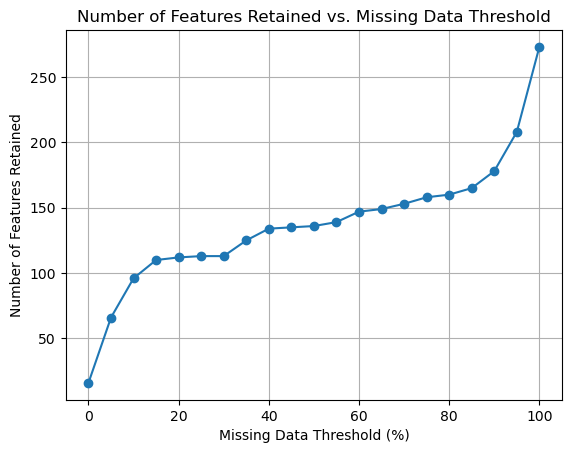

In [108]:
feature_counts = []

for t in thresholds:
    num_features = np.sum(propMissVals <= t)
    feature_counts.append(num_features)

# Plotting the results
plt.plot(thresholds * 100, feature_counts, marker='o')
plt.title('Number of Features Retained vs. Missing Data Threshold')
plt.xlabel('Missing Data Threshold (%)')
plt.ylabel('Number of Features Retained')
plt.grid(True)
plt.show()

### Choosing and applying the threshold

In [109]:
missing_threshold = 0.5
features_to_keep = propMissVals <= missing_threshold

x_train_redMV = x_train_replace[:, features_to_keep]
x_test_redMV = x_test_replace[:, features_to_keep]

print(f'Number of features retained: {x_train_redMV.shape[1]}')

Number of features retained: 136


## 4. Differentiating CATEGORICAL & CONTINUOUS variables

### Visualizing the number of unique values per features (with log scale), with Bar Plot

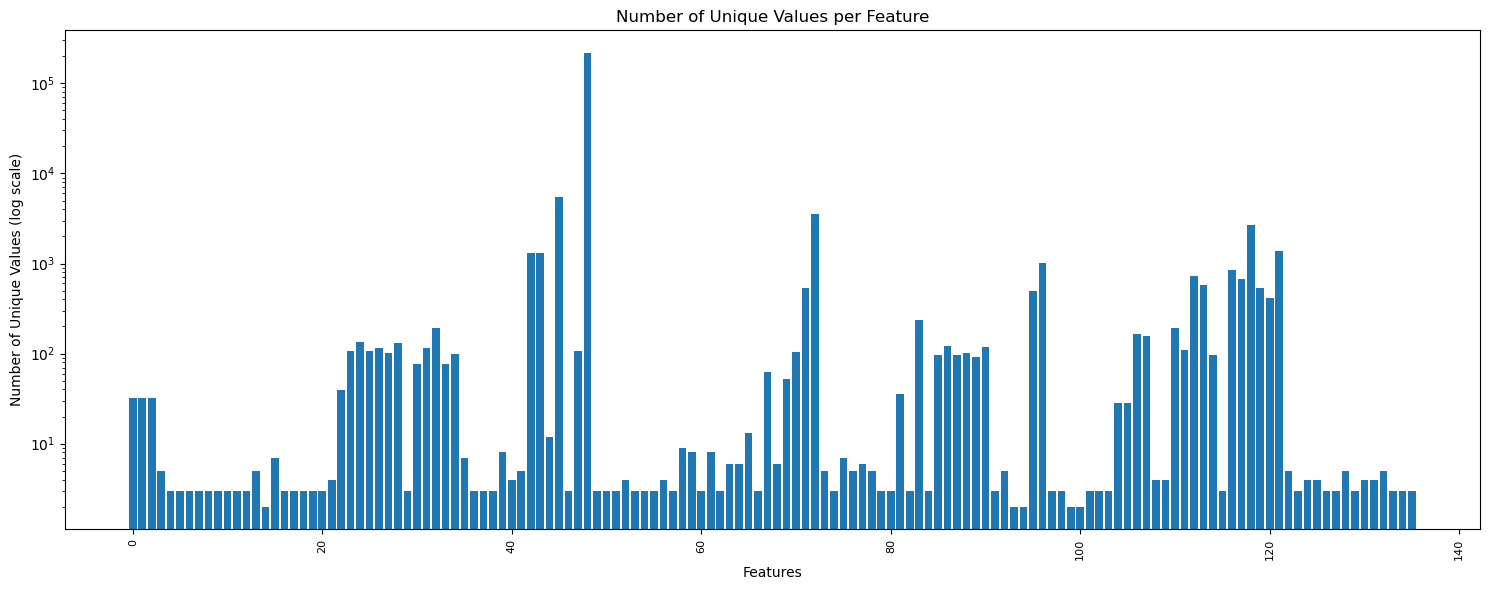

In [110]:
# Data used : x_train_redMV and x_test_redMV

# Calculate the number of unique values per feature
unique_counts = np.array([len(np.unique(x_train_redMV[:, i])) for i in range(x_train_redMV.shape[1])])

features = [i for i in range(136)]

plt.figure(figsize=(15, 6))
plt.bar(features, unique_counts)
plt.yscale('log')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Number of Unique Values (log scale)')
plt.title('Number of Unique Values per Feature')
plt.tight_layout()
plt.show()

# Display unique counts
# for idx, count in enumerate(unique_counts):
#    print(f'Feature {idx}: {count} unique values')

### Defining a threshold for differentiation

In [111]:
# Define threshold for unique values
threshold = 10

# Initialize lists to hold feature indices
categorical_features = []
continuous_features = []

# Classify features based on unique counts
for idx, count in enumerate(unique_counts):
    if count <= threshold:
        categorical_features.append(idx)
    else:
        continuous_features.append(idx)

# Display the classification results
print(f'Number of Categorical Features: {len(categorical_features)}')
print(f'Number of Continuous Features: {len(continuous_features)}')

Number of Categorical Features: 84
Number of Continuous Features: 52


## 5. Imputing values to replace missing data

### Continuous case (using the median) (is there a better way to do that?)

In [112]:
# Impute missing values in continuous features with median
def impute_median_for_continuous_features(x_train, x_test, continuous_indices):
    """
    Impute NaN values in continuous features with the median.

    Args:
        x_train (np.ndarray): Training data with shape (n_samples, n_features).
        x_test (np.ndarray): Test data with shape (n_samples, n_features).
        continuous_indices (list): List of indices corresponding to continuous features.

    Returns:
        np.ndarray: Imputed training data.
        np.ndarray: Imputed test data.
    """
    for idx in continuous_indices:
        # Impute training data
        col = x_train[:, idx]
        median = np.nanmedian(col)
        col = np.where(np.isnan(col), median, col)
        x_train[:, idx] = col

        # Impute test data
        test_col = x_test[:, idx]
        test_col = np.where(np.isnan(test_col), median, test_col)
        x_test[:, idx] = test_col

    return x_train, x_test

# Assuming x_train_final and x_test_final are already defined
x_train_impVal, x_test_impVal = impute_median_for_continuous_features(x_train_redMV, x_test_redMV, continuous_features)

### Categorical case (using the mode)

In [113]:
# CATEGORICAL (MODE)

def impute_mode(x, feature_indices):
    for idx in feature_indices:
        col = x[:, idx]
        # Compute the mode, ignoring NaNs
        unique, counts = np.unique(col[~np.isnan(col)], return_counts=True)
        mode = unique[np.argmax(counts)]
        # Replace NaNs with mode
        col = np.where(np.isnan(col), mode, col)
        x[:, idx] = col
    return x

# Impute mode for categorical features in training and test data
x_train_impVal = impute_mode(x_train_impVal, categorical_features)
x_test_impVal = impute_mode(x_test_impVal, categorical_features)

### Verifying (we should have approx 1 value less per feature due to the removal of the nan value, replaced by an already existing value)

In [114]:
# Calculate the number of unique values per feature
unique_counts = np.array([len(np.unique(x_train_impVal[:, i])) for i in range(x_train_impVal.shape[1])])

# Display unique counts
for idx, count in enumerate(unique_counts):
    print(f'Feature {idx}: {count} unique values')

Feature 0: 31 unique values
Feature 1: 31 unique values
Feature 2: 31 unique values
Feature 3: 4 unique values
Feature 4: 2 unique values
Feature 5: 2 unique values
Feature 6: 2 unique values
Feature 7: 2 unique values
Feature 8: 2 unique values
Feature 9: 2 unique values
Feature 10: 2 unique values
Feature 11: 2 unique values
Feature 12: 2 unique values
Feature 13: 4 unique values
Feature 14: 2 unique values
Feature 15: 6 unique values
Feature 16: 2 unique values
Feature 17: 2 unique values
Feature 18: 2 unique values
Feature 19: 2 unique values
Feature 20: 2 unique values
Feature 21: 3 unique values
Feature 22: 38 unique values
Feature 23: 107 unique values
Feature 24: 132 unique values
Feature 25: 106 unique values
Feature 26: 113 unique values
Feature 27: 101 unique values
Feature 28: 131 unique values
Feature 29: 2 unique values
Feature 30: 75 unique values
Feature 31: 113 unique values
Feature 32: 192 unique values
Feature 33: 76 unique values
Feature 34: 99 unique values
Feature

## 6. Dealing with outliers in Continuous features (by Capping)

In [115]:
# Lower Capping at x'th Percentile: Replace all values below the x'th percentile with the value at the x'th percentile.
# Upper Capping at y'th Percentile: Replace all values above the y'th percentile with the value at the y'th percentile.

# We take here a standard choice of the 1st and 99th percentiles

class CapOutliersResult:
    def __init__(self, x_train_capped, x_test_capped, lower_bounds, upper_bounds):
        self.x_train_capped = x_train_capped
        self.x_test_capped = x_test_capped
        self.lower_bounds = lower_bounds
        self.upper_bounds = upper_bounds

def cap_outliers(x_train, x_test, continuous_indices, lower_percentile=1, upper_percentile=99):
    """
    Caps outliers in continuous features based on specified percentiles.

    Args:
        x_train (np.ndarray): Training data with shape (n_samples, n_features).
        x_test (np.ndarray): Test data with shape (n_samples, n_features).
        continuous_indices (list): List of indices corresponding to continuous features.
        lower_percentile (float): Lower percentile for capping (default is 1).
        upper_percentile (float): Upper percentile for capping (default is 99).

    Returns:
        CapOutliersResult: A result object containing capped data and capping bounds.
    """
    # Copy the data to avoid modifying the original arrays
    x_train_capped = x_train.copy()
    x_test_capped = x_test.copy()
    
    lower_bounds = {}
    upper_bounds = {}
    
    for idx in continuous_indices:
        # Calculate the lower and upper percentile values from the training data
        lower_value = np.percentile(x_train[:, idx], lower_percentile)
        upper_value = np.percentile(x_train[:, idx], upper_percentile)
        
        # Store the calculated bounds
        lower_bounds[idx] = lower_value
        upper_bounds[idx] = upper_value
        
        # Cap the values in the training data
        x_train_capped[:, idx] = np.where(x_train[:, idx] < lower_value, lower_value,
                                          np.where(x_train[:, idx] > upper_value, upper_value, x_train[:, idx]))
        
        # Cap the values in the test data
        x_test_capped[:, idx] = np.where(x_test[:, idx] < lower_value, lower_value,
                                         np.where(x_test[:, idx] > upper_value, upper_value, x_test[:, idx]))
    
    return CapOutliersResult(x_train_capped, x_test_capped, lower_bounds, upper_bounds)


def verify_capping(x, continuous_indices, lower_bounds, upper_bounds):
    """
    Verifies that the capping of outliers worked as expected.

    Args:
        x (np.ndarray): Data to verify with shape (n_samples, n_features).
        continuous_indices (list): List of indices corresponding to continuous features.
        lower_bounds (dict): Dictionary of lower bounds used for capping.
        upper_bounds (dict): Dictionary of upper bounds used for capping.

    Returns:
        None
    """
    for idx in continuous_indices:
        col = x[:, idx]
        lower_bound = lower_bounds[idx]
        upper_bound = upper_bounds[idx]
        
        # Check if any value is below the lower bound
        below = np.sum(col < lower_bound)
        if below > 0:
            print(f"Feature {idx}: {below} values below the lower bound ({lower_bound}).")
        
        # Check if any value is above the upper bound
        above = np.sum(col > upper_bound)
        if above > 0:
            print(f"Feature {idx}: {above} values above the upper bound ({upper_bound}).")
    
    print("Verification completed.")
    
    
    
# Apply capping with default 1st and 99th percentiles
result = cap_outliers(x_train_impVal, x_test_impVal, continuous_features)

# Extract capped data and bounds
x_train_capped = result.x_train_capped
x_test_capped = result.x_test_capped
lower_bounds = result.lower_bounds
upper_bounds = result.upper_bounds

# Verify the capping for training data
print("Verification for training data:")
verify_capping(x_train_capped, continuous_features, lower_bounds, upper_bounds)

# Verify the capping for test data
print("\nVerification for test data:")
verify_capping(x_test_capped, continuous_features, lower_bounds, upper_bounds)

Verification for training data:
Verification completed.

Verification for test data:
Verification completed.


## 7. Encoding Categorical features

We will use : One-Hot encoding and Label encoding

- for Binary Categorical Variables (2 categories): we use Label Encoding to map categories to 0 and 1. This avoids unnecessary feature expansion and maintains computational efficiency;
- for Nominal Categorical Variables (3-7 categories): we use One-Hot Encoding. The increase in feature count is manageable and preserves the categorical nature without introducing ordinal bias.

In [116]:
def encode_categorical_features_mixed(x, binary_indices, nominal_indices):
    """
    Encode categorical features using Label Encoding for binary features and One-Hot Encoding for nominal features.

    Args:
        x (np.ndarray): Input data array with shape (n_samples, n_features).
        binary_indices (list): List of column indices for binary categorical features.
        nominal_indices (list): List of column indices for nominal categorical features.

    Returns:
        np.ndarray: Data array with encoded categorical features.
    """
    # Label Encoding for Binary Features
    for idx in binary_indices:
        col = x[:, idx]
        unique = np.unique(col)
        if len(unique) != 2:
            print(f"Warning: Feature {idx} is not binary. Skipping Label Encoding.")
            continue
        mapping = {unique[0]: 0, unique[1]: 1}
        x[:, idx] = np.vectorize(mapping.get)(col)
    
    # One-Hot Encoding for Nominal Features
    one_hot_columns = []
    for idx in nominal_indices:
        col = x[:, idx].astype(int)
        unique_categories = np.unique(col)
        unique_categories = unique_categories[~np.isnan(unique_categories)]
        #print(f'One-Hot Encoding Feature {idx} with categories: {unique_categories}')
        for category in unique_categories:
            new_col = (col == category).astype(int).reshape(-1, 1)
            one_hot_columns.append(new_col)
    
    if one_hot_columns:
        one_hot_matrix = np.hstack(one_hot_columns)
        # Remove original nominal categorical columns
        x = np.delete(x, nominal_indices, axis=1)
        # Append One-Hot Encoded columns
        x = np.hstack((x, one_hot_matrix))
    
    return x

In [117]:
# Identify binary and nominal categorical features
binary_features = [idx for idx in categorical_features if len(np.unique(x_train_capped[:, idx])) == 2]
nominal_features = [idx for idx in categorical_features if len(np.unique(x_train_capped[:, idx])) > 2]

x_train_encoded = encode_categorical_features_mixed(x_train_capped, binary_features, nominal_features)
print(f'Training data shape after Mixed Encoding: {x_train_encoded.shape}')

# Encode test data
x_test_encoded = encode_categorical_features_mixed(x_test_capped, binary_features, nominal_features)
print(f'Test data shape after Mixed Encoding: {x_test_encoded.shape}')

Training data shape after Mixed Encoding: (328135, 253)
Test data shape after Mixed Encoding: (109379, 253)


## 8. Feature scaling : Standardizing & Normalizing continuous features

In [118]:
# Z-score normalization
def standardize_features(x_train, x_test, continuous_indices):
    """
    Standardize continuous features to have zero mean and unit variance.

    Args:
        x_train (np.ndarray): Training data with shape (n_samples, n_features).
        x_test (np.ndarray): Test data with shape (n_samples, n_features).
        continuous_indices (list): List of column indices corresponding to continuous features.

    Returns:
        np.ndarray: Scaled training data.
        np.ndarray: Scaled test data.
    """
    # Calculate mean and std from training data
    mean = np.mean(x_train[:, continuous_indices], axis=0)
    std = np.std(x_train[:, continuous_indices], axis=0)
    
    # Prevent division by zero
    std_replaced = np.where(std == 0, 1, std)
    
    # Standardize training data
    x_train[:, continuous_indices] = (x_train[:, continuous_indices] - mean) / std_replaced
    
    # Standardize test data using training mean and std
    x_test[:, continuous_indices] = (x_test[:, continuous_indices] - mean) / std_replaced
    
    return x_train, x_test


x_train_scaled, x_test_scaled = standardize_features(x_train_encoded, x_test_encoded, continuous_features)
print(f'Training data shape: {x_train_scaled.shape}')
print(f'Test data shape: {x_test_scaled.shape}')

Training data shape: (328135, 253)
Test data shape: (109379, 253)


## 9. Removing highly correlated features

In [119]:
def remove_highly_correlated_features(train_data, test_data, threshold=0.9):
    """
    Remove one of the two features that have a correlation higher than the threshold.

    Args:
        x (np.ndarray): Input data array.
        threshold (float): Correlation threshold.

    Returns:
        np.ndarray: Data array with highly correlated features removed.
    """
    corr_matrix = np.corrcoef(train_data, rowvar=False)
    upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    to_drop = [column for column in range(corr_matrix.shape[1]) if any(corr_matrix[column, upper[column]] > threshold)]
    return np.delete(train_data, to_drop, axis=1), np.delete(test_data, to_drop, axis=1)

# Example Usage:
x_train_reduced, x_test_reduced = remove_highly_correlated_features(x_train_scaled, x_test_scaled, threshold=0.95)
print(f'Training data shape after Correlation Thresholding: {x_train_reduced.shape}')
print(f'Test data shape after Correlation Thresholding: {x_test_reduced.shape}')

Training data shape after Correlation Thresholding: (328135, 212)
Test data shape after Correlation Thresholding: (109379, 212)


## 10. Removing features with low variance (irrelevant)

In [120]:
def variance_threshold(train_data, test_data, threshold=0.0):
    """
    Remove features with variance below the specified threshold.

    Args:
        x (np.ndarray): Input data array.
        threshold (float): Variance threshold.

    Returns:
        np.ndarray: Data array with low-variance features removed.
    """
    variances = np.var(train_data, axis=0)
    features_to_keep = variances > threshold
    return train_data[:, features_to_keep], test_data[:, features_to_keep]

# Let's use a threshold of 0.01
x_train_selected, x_test_selected = variance_threshold(x_train_reduced, x_train_reduced, threshold=0.01)
print(f'Training data shape after Variance Thresholding: {x_train_selected.shape}')
print(f'Test data shape after Variance Thresholding: {x_test_selected.shape}')

Training data shape after Variance Thresholding: (328135, 194)
Test data shape after Variance Thresholding: (328135, 194)


## 11. Data preparation (Adding bias term + label update for Logistic Regression)

In [123]:
def add_bias_term(x):
    bias = np.ones((x.shape[0], 1))
    return np.hstack((bias, x))

x_train_final = add_bias_term(x_train_selected)
x_test_final = add_bias_term(x_test_selected)

print(f'Training data shape after adding bias: {x_train_final.shape}')
print(f'Test data shape after adding bias: {x_test_final.shape}')

Training data shape after adding bias: (328135, 195)
Test data shape after adding bias: (328135, 195)


In [124]:
# Convert -1 labels to 0 for Logistic Regression
y_train_binary = np.where(y_train == -1, 0, y_train)